In [1]:
import pandas as pd
# import cv2
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np

GT = pd.read_csv("MIDIFILES/Traclssong1.csv", index_col=0)

In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import wave, sys
 
# shows the sound waves
def visualize(path: str):
   
    # reading the audio file
    raw = wave.open(path)
     
    # reads all the frames
    # -1 indicates all or max frames
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, dtype ="int16")
     
    # gets the frame rate
    f_rate = raw.getframerate()
 
    # to Plot the x-axis in seconds
    # you need get the frame rate
    # and divide by size of your signal
    # to create a Time Vector
    # spaced linearly with the size
    # of the audio file
    time = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )

    bettertime = [x for x in time if x < 30]
    
    return bettertime, signal[:len(bettertime)]

original = "/Users/jonas/Documents/GitHub/DJAJONAS/Songs/original.wav"
timeor, signalor = visualize(original)

song1 = "/Users/jonas/Documents/GitHub/DJAJONAS/Songs/song1.wav"
times1, signals1 = visualize(song1)

song0 = "/Users/jonas/Documents/GitHub/DJAJONAS/Songs/song01.wav"
times0, signals0 = visualize(song0)


In [3]:
timeor[-3:]

[29.99994624999307, 29.999968925740824, 29.999991601488578]

<Figure size 7200x4800 with 0 Axes>

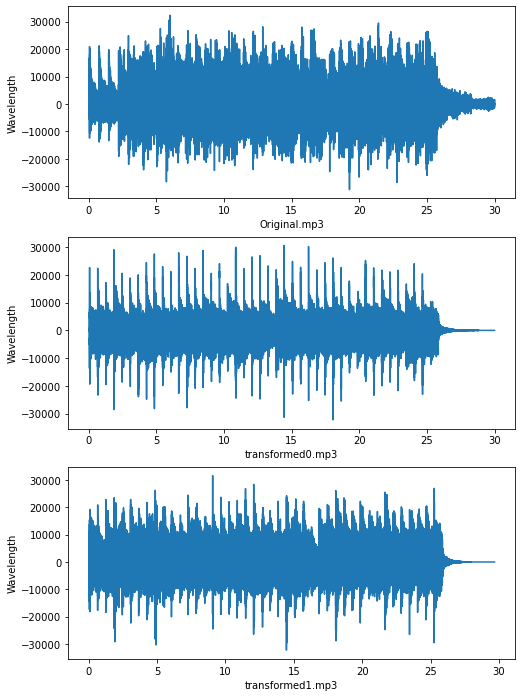

In [6]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 300


# Set the timestep and wavelength values for each plot
# timestep1 = [1, 2, 3, 4, 5]
# wavelength1 = [10, 20, 30, 40, 50]
# timestep2 = [1, 2, 3, 4, 5]
# wavelength2 = [15, 25, 35, 45, 55]
# timestep3 = [1, 2, 3, 4, 5]
# wavelength3 = [5, 15, 25, 35, 45]
plt.figure(dpi=1200)
# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))# Set the labels for the x and y axes
plt.xlabel('Timestep')
plt.ylabel('Wavelength')

# Plot the first graph
ax1.plot(timeor, signalor)
ax1.set_xlabel('Original.mp3')
ax1.set_ylabel('Wavelength')

# Plot the second graph
ax2.plot(times0, signals0)
ax2.set_xlabel('transformed0.mp3')
ax2.set_ylabel('Wavelength')

# Plot the third graph
ax3.plot(times1, signals1)
ax3.set_xlabel('transformed1.mp3')
ax3.set_ylabel('Wavelength')
# plt.subplots_adjust(hspace=0.2)
ax1.set_facecolor('white')

# Show the plot
plt.savefig('figure.png', dpi=500)



## Generated Track

[[60, 58, 61, 63, 60, 63, 59, 63, 63, 60, 60, 58, 60, 60, 63, 58, 60, 58, 60, 58, 63, 63, 58, 62, 58, 60, 60, 63, 60, 60, 60, 58, 58, 60, 60, 60, 60, 60, 58, 63, 58, 58, 63]]


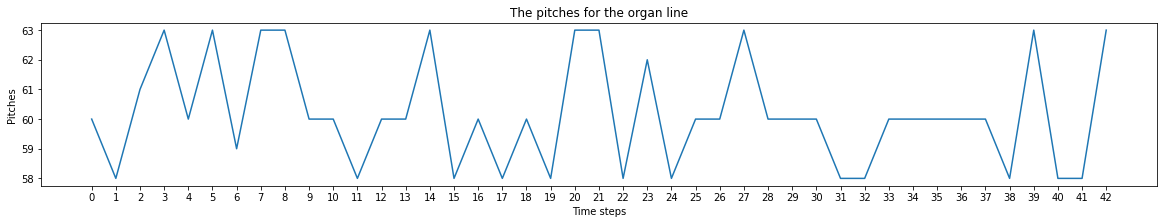

In [211]:
GT = pd.read_csv("MIDIFILES/Traclssong1.csv", index_col=0)
notes = []
for el in GT.columns:
    notes.append(GT[el].to_list())
x = [i for i in range((43))]

notesReal = [(literal_eval(notes[i][0])) for i in range(3)]
# for notes in notesReal:
y = [notesReal[2]]
print(y)
for y_values in y:
    plt.plot(x, y_values)
plt.rcParams["figure.figsize"] = (20,3)
plt.title("The pitches for the organ line")
plt.xlabel("Time steps")
plt.ylabel("Pitches")
plt.xticks(x)  # add this or the plot api will add extra ticks
plt.show()

## Original Song

In [86]:
song = pd.read_csv("Assets/Song.csv")
channel = np.unique(song['channel'].to_list())

In [87]:
song.loc[song['channel'] == 2]

,Unnamed: 0,track,channel,pitch,duration,time
63,63,2,2,51,1.00,0.0
64,64,2,2,51,1.00,1.0
65,65,2,2,51,1.00,2.0
66,66,2,2,73,1.00,3.0
67,67,2,2,63,1.00,4.0
68,68,2,2,63,1.00,5.0
69,69,2,2,80,1.00,6.0
70,70,2,2,80,1.00,9.0
71,71,2,2,80,1.00,10.0
72,72,2,2,75,1.00,11.0


In [88]:
instruments = []
for c in channel:
    tempdf = song.loc[song['channel'] == c]
    pitch, duration, time = tempdf['pitch'].to_list, tempdf['duration'].to_list(), tempdf['time'].to_list()
#     print(tempdf)
    times =[]
    for t in time:
        timedf = tempdf.loc[tempdf['time'] == t]
        times.append(len(timedf))
        
        
    
    emptyList = [[] for _ in range(max(np.unique(times)))]

    dicter = {}    
    for t in time:
        timedf = tempdf.loc[tempdf['time'] == t]

        pitch, duration = timedf['pitch'].to_list(), timedf['duration'].to_list()
        
        for i in range(len(timedf)):
            pitchT, durationT = pitch[i], duration[i]
            for j in range(int(durationT)):
#                 dicter[t+j] = pitchT
                emptyList[i].append(pitchT)
    instruments.append(emptyList)


In [89]:
len(instruments[0][0])

36

In [90]:
import matplotlib.pylab as plt

lists = sorted(instruments[3][0].items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

AttributeError: 'list' object has no attribute 'items'

## Different vis

In [91]:
def read2(length):
	songDf = pd.read_csv("Assets/Song.csv", index_col=0)
	times = songDf['time'].to_list()
	maxLength = max([len(songDf.loc[songDf['time'] == el]) for el in np.unique(times)])
	tunes = []
	for el in np.unique(times):
		tempTrack = [0 for i in range(maxLength)]
		temp_df = songDf.loc[songDf['time'] == el]
		pitches = temp_df['pitch'].to_list()
		for i, pitch in enumerate(pitches):
			tempTrack[i] = pitch
			
		tunes.append(tempTrack)
	tunes = tunes[:length]
	
	return np.asarray(tunes).T, temp_df

In [92]:
# song, df = read2(200)
song.loc[song['channel'] == 0]

,Unnamed: 0,track,channel,pitch,duration,time
0,0,0,0,46,3.0,0.0
1,1,0,0,44,1.0,3.0
2,2,0,0,44,1.0,4.0
3,3,0,0,44,1.0,5.0
4,4,0,0,42,1.0,6.0
5,5,0,0,49,1.0,7.0
6,6,0,0,49,1.0,8.0
7,7,0,0,41,1.0,9.0
8,8,0,0,48,1.0,10.0
9,9,0,0,48,1.0,11.0


In [93]:
allChannel = [0,1,2,3]
channelstotal = [[] for _ in range(4)]
for time in np.unique(song['time'].to_list()):
    tempDf = song.loc[song['time'] == time].reset_index(drop=True)
    channels = np.unique(tempDf['channel'].to_list())

    for i, channel in enumerate(allChannel):
        try:
            chandf = tempDf.loc[tempDf['channel'] == channel]
            if len(chandf) == 0:
                channelstotal[channel].append(([0], 1))
            else:
                pitches = chandf['pitch'].to_list()
                duration = chandf['duration'].to_list()
                channelstotal[channel].append((pitches, int(duration[0])))
        except:
            
            channelstotal[channel].append(0)

In [95]:
temp, s = read2(200)

In [97]:
## One more try
lijst = []
for chan in allChannel:
    tempdf = song.loc[song['channel'] == chan]
    lijst.append({chan:len(np.unique(tempdf['time'].to_list()))})
    
lijst

[{0: 30}, {1: 11}, {2: 20}, {3: 41}]

In [98]:
total = []
for chan in allChannel:
    print(f"New channel; {chan}!")
    tempdf = song.loc[song['channel'] == chan]
#     lijst.append({chan:len(np.unique(tempdf['time'].to_list()))})
    time = tempdf['time'].to_list()
    times = []
    for t in time:
        timedf = tempdf.loc[tempdf['time'] == t]
        times.append(len(timedf))

    pitchList = [[0 for i in range(43)] for _ in range(max(np.unique(times)))]
    print(pitchList)
    for t in time:
        timedf = tempdf.loc[tempdf['time'] == t]

        pitch, duration = timedf['pitch'].to_list(), timedf['duration'].to_list()
        for i, el in enumerate(pitch):
            for j in range(int(duration[0])):
                pitchList[i][int(t+j)] = pitch[0]
                
    total.append(pitchList)
#         print(pitch)
#     print(pitches)

New channel; 0!
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
New channel; 1!
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
New channel; 2!
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
New channel; 3!
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


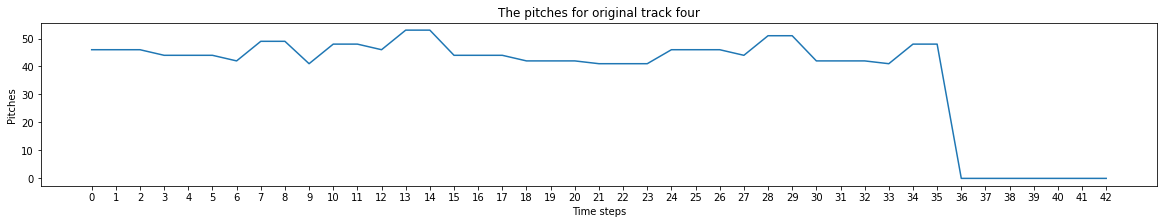

In [101]:
x = [i for i in range((43))]
y = total[0]
for y_values in y:
    plt.plot(x, y_values)
# plt.rcParams["figure.figsize"] = (20,3)
plt.title("The pitches for original track four")
plt.xlabel("Time steps")
plt.ylabel("Pitches")
plt.xticks(x)  # add this or the plot api will add extra ticks
plt.show()

In [140]:
RT = pd.read_csv("MIDIFILES/Ratingssong1.csv", index_col=0)

In [142]:
ding = [list(np.asarray(RT['Instrument1'].to_list())*10), 
        list(np.asarray(RT['Inst2'].to_list())*10)
        , list(np.asarray(RT['Inst3'].to_list())*10)]
ding

[[2.0, 4.0, 5.0, 4.0, 4.0, 5.0, 5.0, 6.0, 5.0, 5.0],
 [1.0, 4.0, 4.0, 3.0, 3.0, 3.0, 5.0, 4.0, 6.0, 5.0],
 [2.0, 2.0, 4.0, 5.0, 5.0, 6.0, 5.0, 6.0, 5.0, 5.0]]

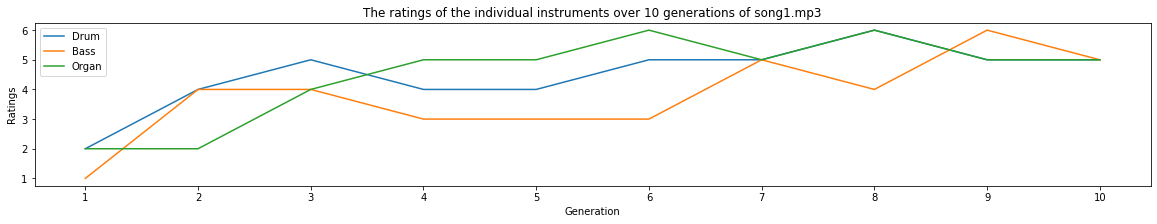

In [151]:
x = [i for i in range(1,11)]
ins = ['Drum', "Bass", "Organ"]
y = ding
for i, y_values in enumerate(y):
    plt.plot(x, y_values, label = str(ins[i]))
plt.rcParams["figure.figsize"] = (20,3)
plt.title("The ratings of the individual instruments over 10 generations of song1.mp3")
plt.xlabel("Generation")
plt.ylabel("Ratings")
plt.legend()
plt.xticks(x)  # add this or the plot api will add extra ticks
plt.show()

In [152]:
RT

,Instrument1,Inst2,Inst3
0,0.2,0.1,0.2
1,0.4,0.4,0.2
2,0.5,0.4,0.4
3,0.4,0.3,0.5
4,0.4,0.3,0.5
5,0.5,0.3,0.6
6,0.5,0.5,0.5
7,0.6,0.4,0.6
8,0.5,0.6,0.5
9,0.5,0.5,0.5


In [6]:
import pandas as pd
from scipy.stats import ttest_rel

# Load the data into a pandas DataFrame
df1 = pd.read_csv("MIDIFILES/Ratingssong1.csv", index_col=0)
df2 = pd.read_csv("MIDIFILES/Ratingssong0.csv", index_col=0)


# Perform the paired t-test on the differences
t_instr1, p_instr1 = ttest_rel(df1["Instrument1"], df2["Instrument1"])
t_instr2, p_instr2 = ttest_rel(df1["Inst2"], df2["Inst2"])
t_instr3, p_instr3 = ttest_rel(df1["Inst3"], df2["Inst3"])

# Save the results in a DataFrame
results_df = pd.DataFrame({"Instrument": ["instr1", "instr2", "instr3"], 
                           "t-value": [t_instr1, t_instr2, t_instr3], 
                           "p-value": [p_instr1, p_instr2, p_instr3]})

# Print the results as a LaTeX table
print(results_df.to_latex(index=False))


\begin{tabular}{lrr}
\toprule
Instrument &   t-value &  p-value \\
\midrule
    instr1 & -9.486833 & 0.000006 \\
    instr2 & -8.337304 & 0.000016 \\
    instr3 & -6.861994 & 0.000074 \\
\bottomrule
\end{tabular}



/var/folders/x2/n4rtrkhx04lf59vd0794swj80000gn/T/ipykernel_73520/233524648.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_df.to_latex(index=False))
